## Museums, Aquariums and Zoos
Name, location and revenue for every museum in US
Taken from: https://www.kaggle.com/imls/museum-directory

## Content
The museum dataset is an evolving list of museums and related organizations in the United States. The data file includes basic information about each organization (name, address, phone, website, and revenue) plus the museum type or discipline. The discipline type is based on the National Taxonomy of Exempt Entities, which the National Center for Charitable Statistics and IRS use to classify nonprofit organizations.

Non-museum organizations may be included. For example, a non-museum organization may be included in the data file because it has a museum-like name on its IRS record for tax-exempt organizations. Museum foundations may also be included.

Museums may be missing. For example, local municipal museums may be undercounted because original data sources used to create the compilation did not include them.

Museums may be listed multiple times. For example, one museum may be listed as both itself and its parent organization because it was listed differently in each original data sources. Duplicate records are especially common for museums located within universities.

Information about museums may be outdated. The original scan and compilation of data sources occurred in 2014. Scans are no longer being done to update the data sources or add new data sources to the compilation. Information about museums may have changed since it was originally included in the file.

## Acknowledgements
The museum data was compiled from IMLS administrative records for discretionary grant recipients, IRS records for tax-exempt organizations, and private foundation grant recipients.

## Inspiration
Which city or state has the most museums per capita?
How many zoos or aquariums exist in the United States?
What museum or related organization had the highest revenue last year?

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('museums.csv', low_memory=False)
data.drop(data.columns[[3,5,10,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
data

,Museum ID,Museum Name,Legal Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),City (Physical Location),State (Physical Location),Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NaN,NaN,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NaN,NaN,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,9711 KENAI SPUR HWY,KENAI,AK,99611,NaN,NaN,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,214 BIRCH STREET,KENAI,AK,99611,NaN,NaN,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,NaN,201312.0,602912.0,550236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,HISTORIC PRESERVATION,PO BOX 73,SHERIDAN,WY,82801,SHERIDAN,WY,NaN,NaN,NaN
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,GENERAL MUSEUM,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,CHEYENNE,WY,201404.0,0.0,0.0
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,HISTORIC PRESERVATION,1273 N 15TH ST STE 121,LARAMIE,WY,82072,NaN,NaN,201312.0,208508.0,83981.0
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,HISTORY MUSEUM,PO BOX 704,CHEYENNE,WY,82003,CHEYENNE,WY,201309.0,0.0,0.0


In [3]:
# Question 1
states = data.iloc[:,8]
states.value_counts(dropna=False)

NaN                  23849
NEW YORK                70
WASHINGTON              64
SPRINGFIELD             43
LOS ANGELES             42
                     ...  
OLD ORCHARD BEACH        1
BROWNVILLE ��            1
BUCKSPORT                1
CARIBOU                  1
WRIGHT                   1
Name: City (Physical Location), Length: 4481, dtype: int64

In [4]:
cities = data.iloc[:,7]
cities.value_counts(dropna=False)

74743    67
92101    38
19106    37
10011    27
2840     26
         ..
48309     1
48041     1
49801     1
49309     1
82190     1
Name: Zip Code (Administrative Location), Length: 15485, dtype: int64

In [5]:
# Question 2
types = data.iloc[:,4]
print("Number of Zoos and Aquariums:", types.value_counts()[6])

Number of Zoos and Aquariums: 27


In [6]:
# Question 3
data2 = data.iloc[:,[1,-1]]
data2 = data2.sort_values(by='Revenue')
data2.head()

,Museum Name,Revenue
33015,SHERIDAN HERTIAGE CENTER,-2127393.0
13509,BANGOR MUSEUM AND CENTER FOR HISTORY,-1799709.0
21282,MORRELLY HOMELAND SECURITY CENTER,-1723674.0
6226,MARY BROGAN MUSEUM OF ART AND SCIENCE,-598813.0
29359,TEXAS AVIATION HALL OF FAME,-567630.0


In [7]:
# Question 4
data3 = data.iloc[:,[6,-2]]
incomes = data3.iloc[:,0].value_counts('Income')
incomes.head()

CA    0.080733
NY    0.067701
TX    0.057027
PA    0.049982
OH    0.041213
Name: State (Administrative Location), dtype: float64

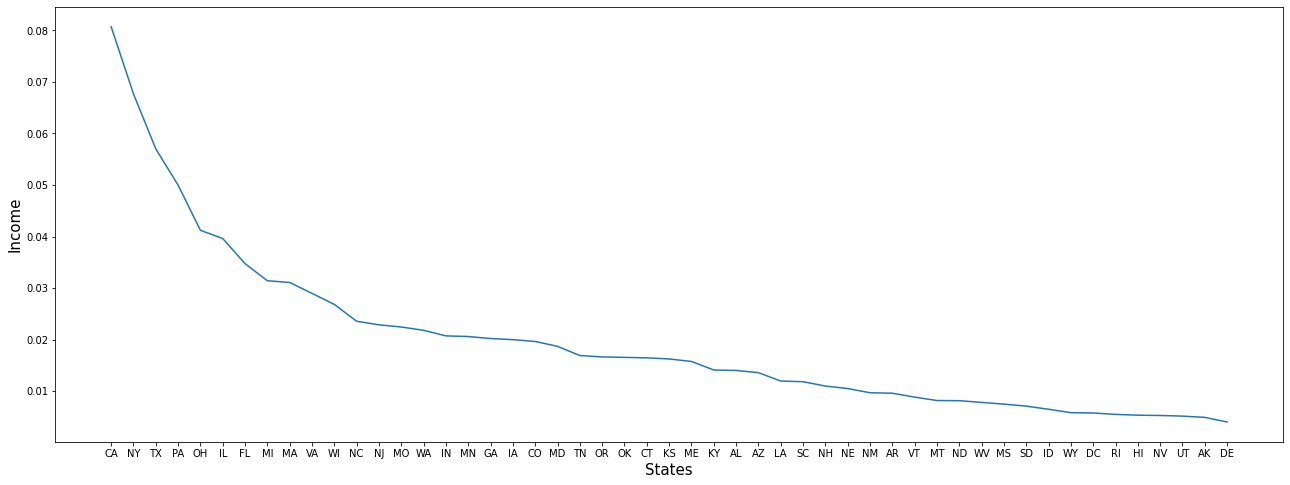

In [15]:
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(8)

plt.plot(incomes)
plt.xlabel("States", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

That plot above shows us more popular and/or crowded, whatever you say states has more income.